# Preliminaries

In [43]:
# importing librraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [47]:
path = "C:/Users/Mehmet/Desktop/New folder/data/solar_power_ data/solarpowergeneration_panel_data.csv"

In [48]:
df = pd.read_csv(path)

In [4]:
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [5]:
# analysing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.2 KB


# Descriptive Statistics of The Data, Missing Values and Outliers

In [7]:
# Checking missing values
print(pd.isnull(df).any())

distance-to-solar-noon         False
temperature                    False
wind-direction                 False
wind-speed                     False
sky-cover                      False
visibility                     False
humidity                       False
average-wind-speed-(period)     True
average-pressure-(period)      False
power-generated                False
dtype: bool


In [8]:
df[df.isna().any(axis=1)]

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
714,0.406143,57,12,2.8,2,4.0,96,NaN,30.16,159


In [9]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df = pd.DataFrame(imp.fit_transform(df),columns=df.columns)
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69.0,28.0,7.5,0.0,10.0,75.0,8.0,29.82,0.0
1,0.628535,69.0,28.0,7.5,0.0,10.0,77.0,5.0,29.85,0.0
2,0.397172,69.0,28.0,7.5,0.0,10.0,70.0,0.0,29.89,5418.0
3,0.165810,69.0,28.0,7.5,0.0,10.0,33.0,0.0,29.91,25477.0
4,0.065553,69.0,28.0,7.5,0.0,10.0,21.0,3.0,29.89,30069.0
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63.0,27.0,13.9,4.0,10.0,75.0,10.0,29.93,6995.0
2916,0.064020,63.0,27.0,13.9,1.0,10.0,66.0,15.0,29.91,29490.0
2917,0.294494,63.0,27.0,13.9,2.0,10.0,68.0,21.0,29.88,17257.0
2918,0.524968,63.0,27.0,13.9,2.0,10.0,81.0,17.0,29.87,677.0


In [10]:
df[df.isna().any(axis=1)]

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated


In [6]:
# Descriptive statistics
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


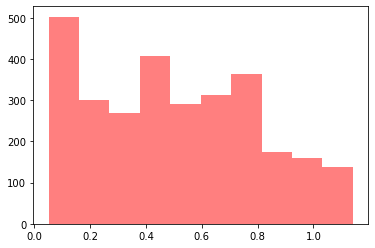

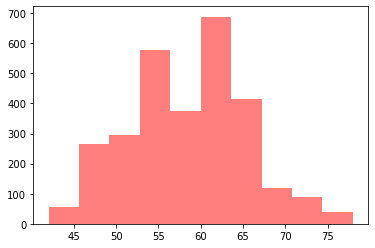

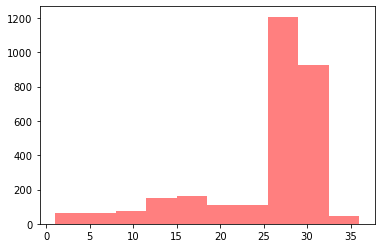

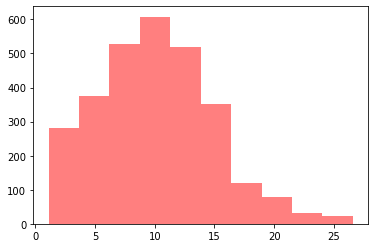

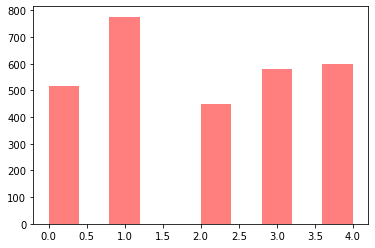

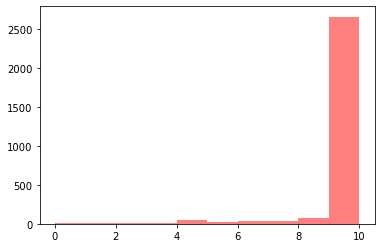

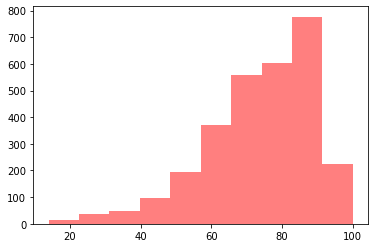

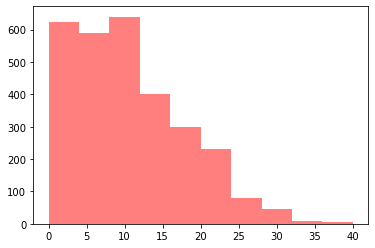

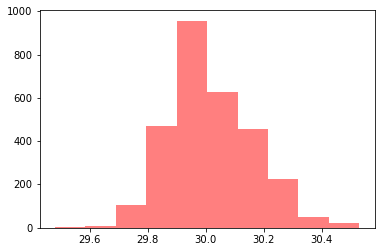

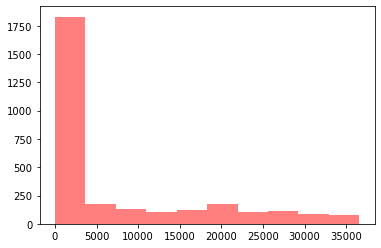

In [11]:
for i in df.columns:
    plt.hist(df[i],10,facecolor='red', alpha=0.5, label=str(i))
    plt.show()

<Figure size 720x576 with 0 Axes>

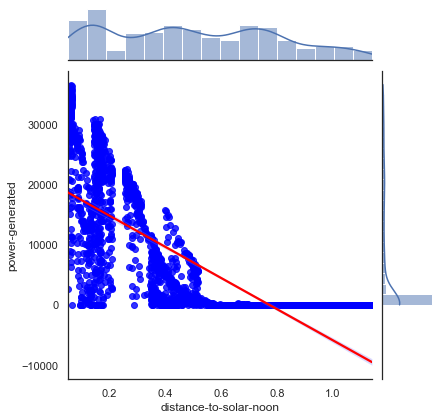

<Figure size 720x576 with 0 Axes>

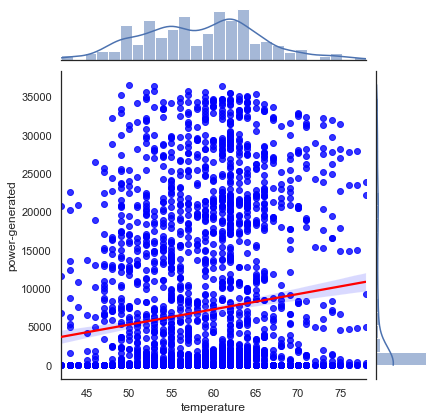

<Figure size 720x576 with 0 Axes>

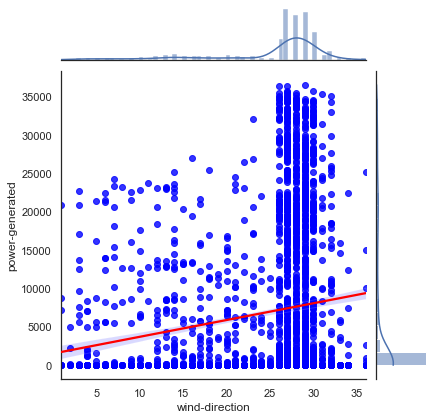

<Figure size 720x576 with 0 Axes>

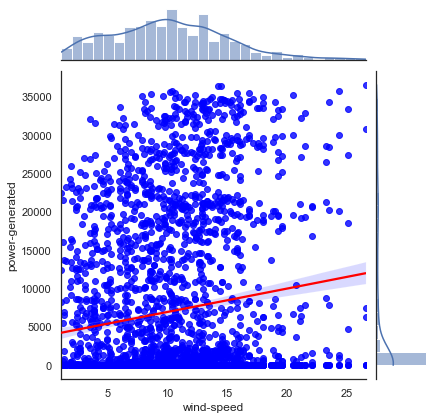

<Figure size 720x576 with 0 Axes>

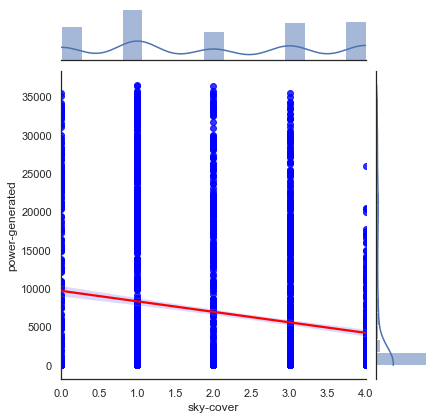

<Figure size 720x576 with 0 Axes>

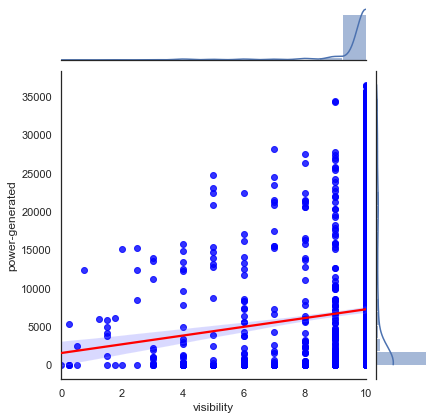

<Figure size 720x576 with 0 Axes>

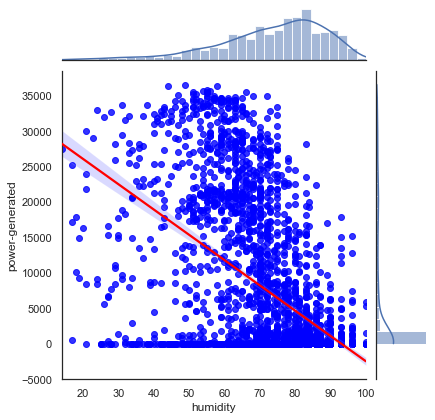

<Figure size 720x576 with 0 Axes>

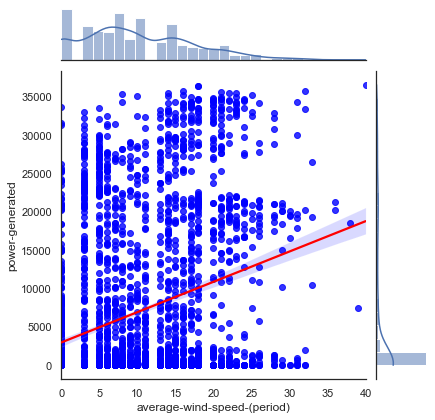

<Figure size 720x576 with 0 Axes>

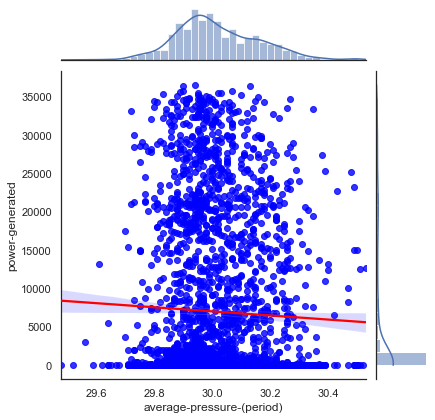

In [12]:
import seaborn as sns
#Indent variables against depend variable
for i in df.columns[:-1]:
    fig = plt.figure(figsize=(10,8))
    sns.set(style="white", color_codes=True)
    g = sns.jointplot(x=i, y="power-generated", data=df, kind='reg',joint_kws={'color':'blue'})
    regline = g.ax_joint.get_lines()[0]
    regline.set_color('red')
    regline.set_zorder(5)
                                                                           
    plt.show()

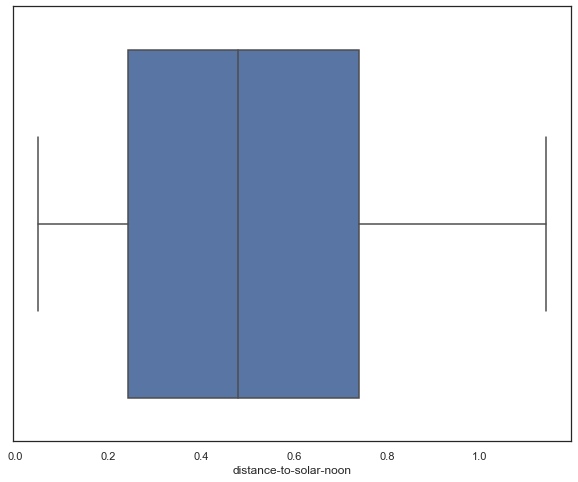

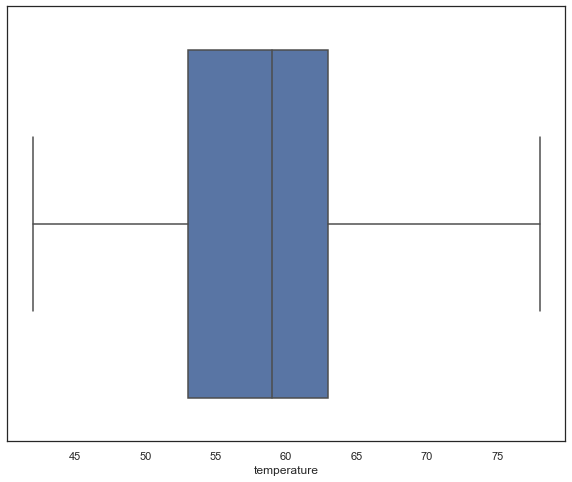

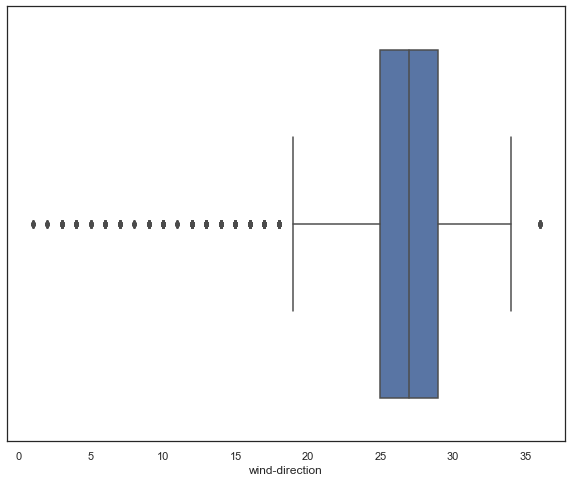

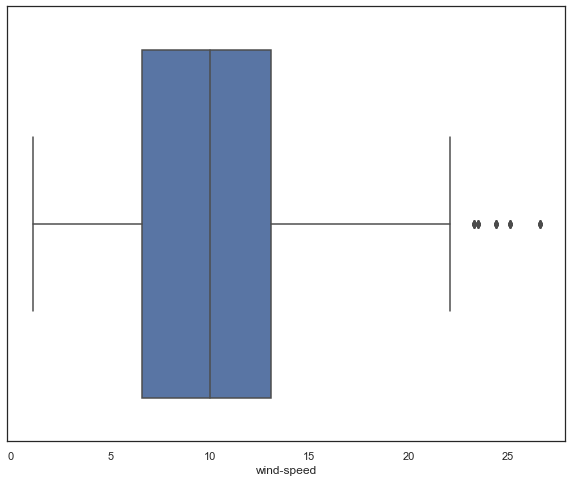

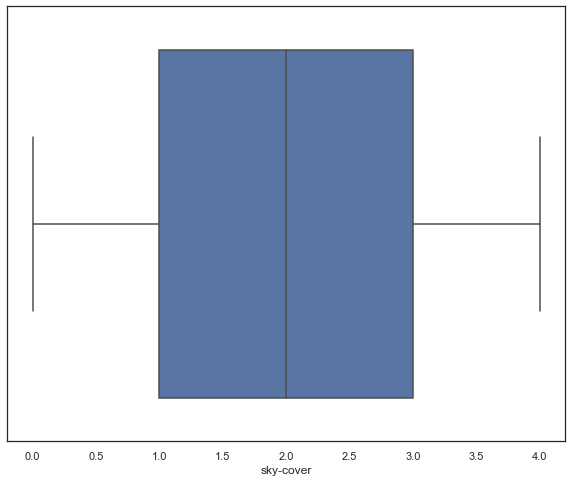

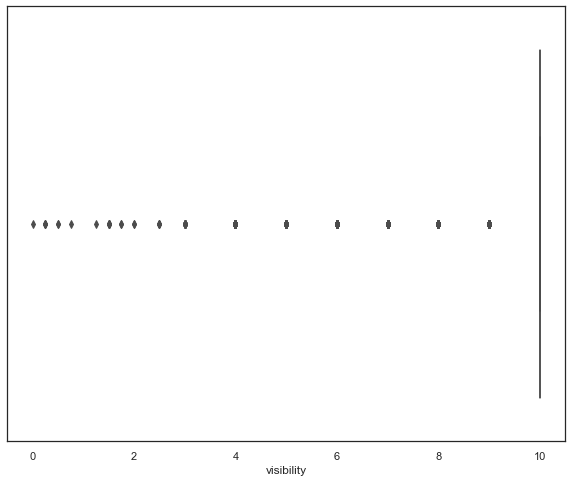

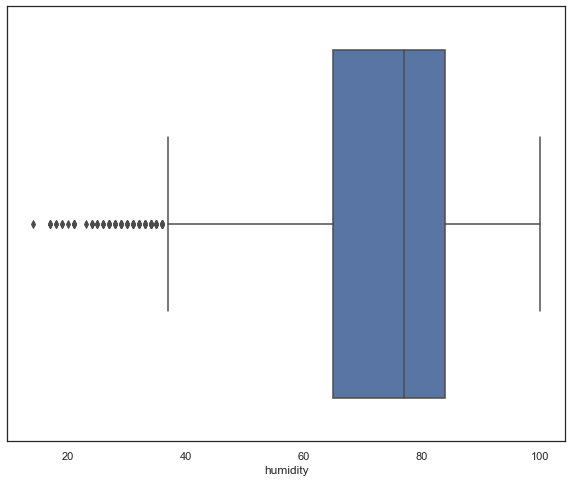

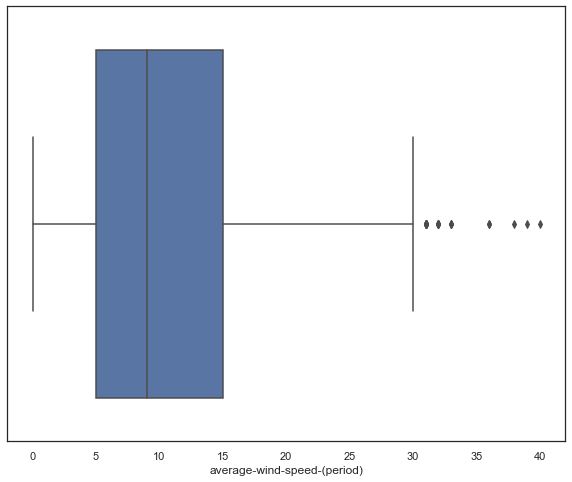

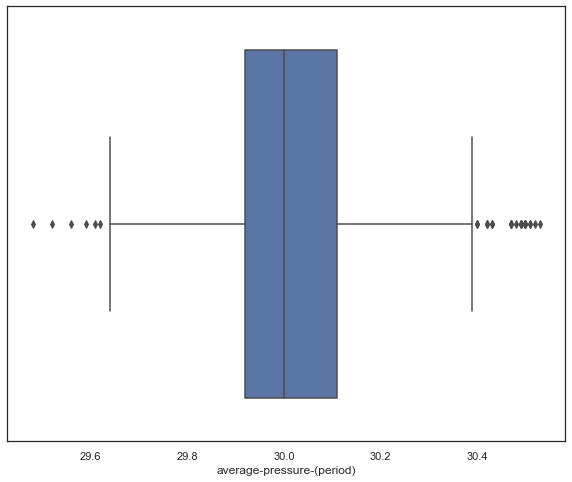

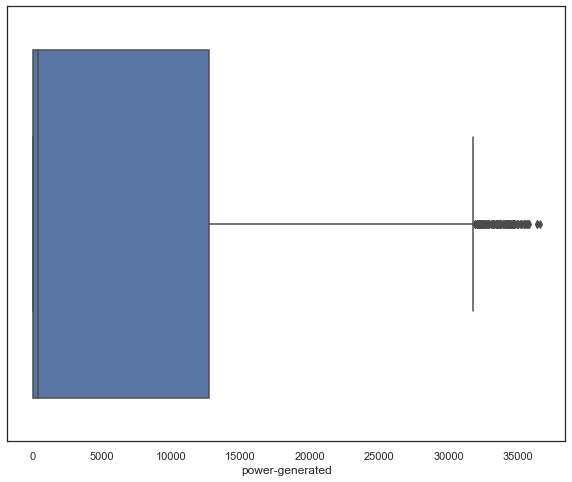

In [13]:

for i in df.columns:
    fig= plt.figure(figsize=(10,8))
    sns.boxplot(x=df[i])
    plt.show()

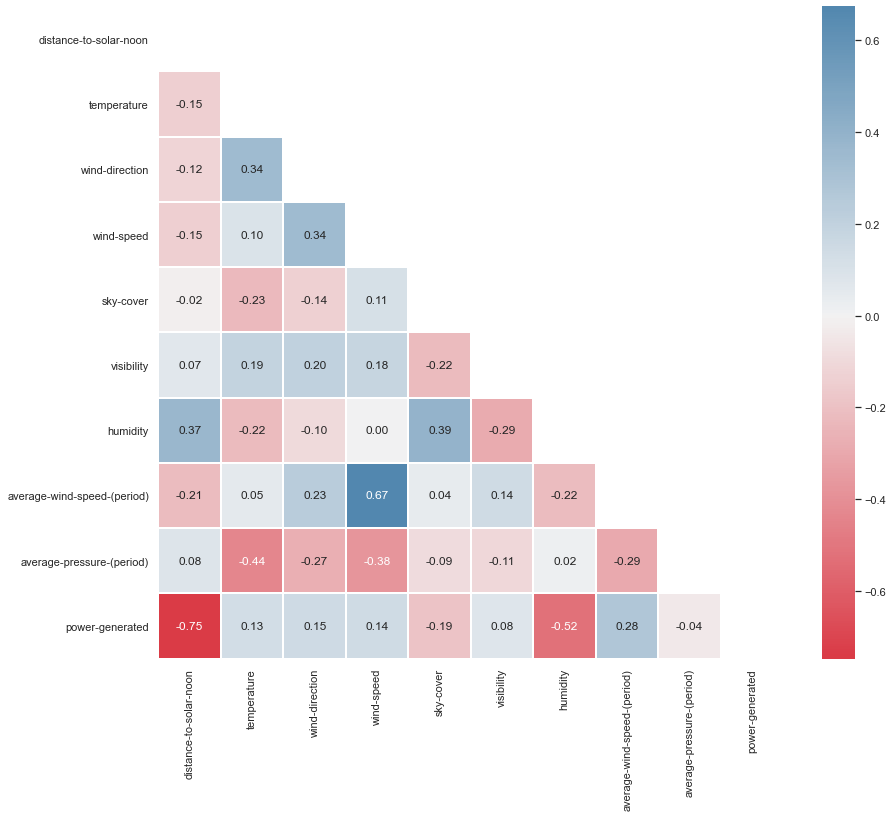

In [14]:
# Correlation Matrix and visualazing it on heat map
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
figure = plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), mask=mask,center=0, cmap=cmap, linewidths=1,annot=True, fmt=".2f")
plt.show()

In [15]:
from scipy import stats
for i in df.columns:
    df['z_score'] = stats.zscore(df[i])
    print('The number of outlier is {} in the {} column.'.format(df['z_score'][df['z_score'].abs()>3].count(),str(i)))
    df.drop('z_score',inplace=True,axis=1); 

The number of outlier is 0 in the distance-to-solar-noon column.
The number of outlier is 0 in the temperature column.
The number of outlier is 64 in the wind-direction column.
The number of outlier is 16 in the wind-speed column.
The number of outlier is 0 in the sky-cover column.
The number of outlier is 109 in the visibility column.
The number of outlier is 35 in the humidity column.
The number of outlier is 14 in the average-wind-speed-(period) column.
The number of outlier is 23 in the average-pressure-(period) column.
The number of outlier is 0 in the power-generated column.


# Determining target and featues and  scaling

In [16]:
y=df.iloc[:,-1]
X = df.iloc[:,:-1]

In [17]:
# Scale the data with `StandardScaler`
from sklearn.preprocessing import StandardScaler
X =StandardScaler().fit_transform(X)
X = pd.DataFrame(X,columns=df.columns[:-1])

In [18]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Neural Network Architecture, grid search optimizers

In [19]:
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import BatchNormalization
from sklearn.metrics import r2_score
from keras.regularizers import l2
from keras.layers import Dropout,Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam
from keras.models import Sequential
from keras import regularizers

In [20]:
def make_keras_model(learning_rate=0.01,activation='relu',layer1_units=64, layer2_units=64,
                      layer3_units=64,dropout_rate=0.1, nbr_features=X.shape[1] ,l2_regularization=regularizers.L2(0.01)):
     
        # Describing optimization function
        opt = Adam(lr =learning_rate)  
        # Initialize the model
        model = Sequential()
        # Add input layer 
        model.add(Dense(layer1_units,input_shape=(nbr_features,),activation=activation,kernel_regularizer=l2_regularization))
        # Add Batchnormalization layer
        model.add(BatchNormalization())
        # Add first hidden layer
        model.add(Dense(layer2_units, activation = activation,kernel_regularizer=l2_regularization))
        # Add Batchnormalization layer
        model.add(BatchNormalization())
        # Add droupout layer
        model.add(Dropout(rate=dropout_rate))
        # Add Batchnormalization layer
        model.add(BatchNormalization())
        # Add second hidden layer
        model.add(Dense(layer3_units, activation = activation,kernel_regularizer=l2_regularization))
        # Add Batchnormalization layer
        model.add(BatchNormalization())
        # Add output layer
        model.add(Dense(1,activation='linear'))
    
        # Compile your model with your optimizer, loss, and metrics
        model.compile(optimizer = opt, loss = 'mse', metrics = ['mae'])
        return model

In [21]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor_keras = KerasRegressor(make_keras_model, 
                                 batch_size=32, 
                                 layer1_units=64,
                                 layer2_units=64,
                                 layer3_units=64,
                                 dropout_rate=0,
                                 epochs=10, 
                                 verbose=False)

In [22]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
pipeline_keras = Pipeline([('imputer', SimpleImputer()), 
                           ('scaler', StandardScaler()), 
                           ('model', regressor_keras)])

In [23]:
   param_grid_keras ={
    
    'scaler': [StandardScaler()],
    'model__layer1_units': [32,64],
    'model__layer2_units': [16, 32],
    'model__layer3_units': [8, 16],
    'model__dropout_rate': [0, 0.2],
    'model__epochs': [10,20,30,60,120],
    'model__learning_rate':[0.01,0.1],
    'model__activation':['relu','tanh'],
    'model__batch_size':[32,64,128]
    
    
}

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
gridsearch_keras = GridSearchCV(pipeline_keras,
                                param_grid=param_grid_keras,
                                scoring='neg_mean_squared_error',
                                cv=2, 
                                refit=True,
                                verbose=True)

In [25]:
gridsearch_keras.fit(X_train, y_train)

Fitting 2 folds for each of 960 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed: 272.6min finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000012280BB7C0>)]),
             param_grid={'model__activation': ['relu', 'tanh'],
                         'model__batch_size': [32, 64, 128],
                         'model__dropout_rate': [0, 0.2],
                         'model__epochs': [10, 20, 30, 60, 120],
                         'model__layer1_units': [32, 64],
                         'model__layer2_units': [16, 32],
                         'model__layer3_units': [8, 16],
                         'model__learning_rate': [0.01, 0.1],
                         'scaler': [StandardScaler()]},
             scoring='neg_mean_squared_error', verbose=True)

In [26]:
y_pred_keras = gridsearch_keras.predict(X_test)

In [27]:
print(f'Best params: {gridsearch_keras.best_params_}')

Best params: {'model__activation': 'relu', 'model__batch_size': 32, 'model__dropout_rate': 0.2, 'model__epochs': 60, 'model__layer1_units': 32, 'model__layer2_units': 16, 'model__layer3_units': 16, 'model__learning_rate': 0.1, 'scaler': StandardScaler()}


In [28]:
print(f'Best score: {gridsearch_keras.best_score_}')

Best score: -12177706.5715338


In [29]:
print(f'Test MSE: {mean_squared_error(y_true=y_test, y_pred=y_pred_keras)}')

Test MSE: 13845120.831324114


In [30]:
print(f'Test MAE: {mean_absolute_error(y_true=y_test, y_pred=y_pred_keras)}')

Test MAE: 2216.295185227612


In [31]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred_keras)
print('R2: ' '{:.4f}'.format(r2_score))

R2: 0.8655


In [32]:
gridsearch_keras.best_params_['model__batch_size']

32

# Optimized Neural Network Model

In [36]:
# Describing optimization function
opt = Adam(lr =gridsearch_keras.best_params_['model__learning_rate'])  
# Initialize the model
model_tuned = Sequential()
# Add input layer 
model_tuned.add(Dense(gridsearch_keras.best_params_['model__layer1_units'],input_shape=(X.shape[1],),activation=gridsearch_keras.best_params_['model__activation'],kernel_regularizer=regularizers.L2(0.01)))
# Add Batchnormalization layer
model_tuned.add(BatchNormalization())
# Add first hidden layer
model_tuned.add(Dense(gridsearch_keras.best_params_['model__layer2_units'], activation = gridsearch_keras.best_params_['model__activation'],kernel_regularizer=regularizers.L2(0.01)))
# Add Batchnormalization layer
model_tuned.add(BatchNormalization())
# Add droupout layer
model_tuned.add(Dropout(rate=gridsearch_keras.best_params_['model__dropout_rate']))
# Add Batchnormalization layer
model_tuned.add(BatchNormalization())
# Add second hidden layer
model_tuned.add(Dense(gridsearch_keras.best_params_['model__layer3_units'], activation = gridsearch_keras.best_params_['model__activation'],kernel_regularizer=regularizers.L2(0.01)))
# Add Batchnormalization layer
model_tuned.add(BatchNormalization())
# Add output layer
model_tuned.add(Dense(1,activation='linear'))
    
# Compile your model with your optimizer, loss, and metrics
model_tuned.compile(optimizer = opt, loss = 'mse', metrics = ['mae'])

In [37]:
model_tuned_hist = model_tuned.fit(X_train, y_train,epochs = gridsearch_keras.best_params_['model__epochs']
                                                 ,batch_size=gridsearch_keras.best_params_['model__batch_size'],
               validation_data=(X_test, y_test))

Epoch 1/60
62/62 [==============================] - 6s 23ms/step - loss: 167841614.4762 - mae: 7546.9522 - val_loss: 100598416.0000 - val_mae: 8680.2256
Epoch 2/60
62/62 [==============================] - 0s 8ms/step - loss: 112316128.0000 - mae: 6034.4037 - val_loss: 289718112.0000 - val_mae: 15715.8145
Epoch 3/60
62/62 [==============================] - 1s 9ms/step - loss: 43641204.4127 - mae: 4066.6710 - val_loss: 314951936.0000 - val_mae: 16930.1172
Epoch 4/60
62/62 [==============================] - 1s 8ms/step - loss: 19698231.4762 - mae: 3017.5355 - val_loss: 186516720.0000 - val_mae: 12805.1426
Epoch 5/60
62/62 [==============================] - 0s 7ms/step - loss: 18971851.5714 - mae: 2893.7007 - val_loss: 85734368.0000 - val_mae: 8395.1885
Epoch 6/60
62/62 [==============================] - 0s 7ms/step - loss: 19805590.1032 - mae: 2840.3726 - val_loss: 76228880.0000 - val_mae: 7959.7974
Epoch 7/60
62/62 [==============================] - 0s 7ms/step - loss: 17961543.3175 - ma

# Diagnostic and prediction

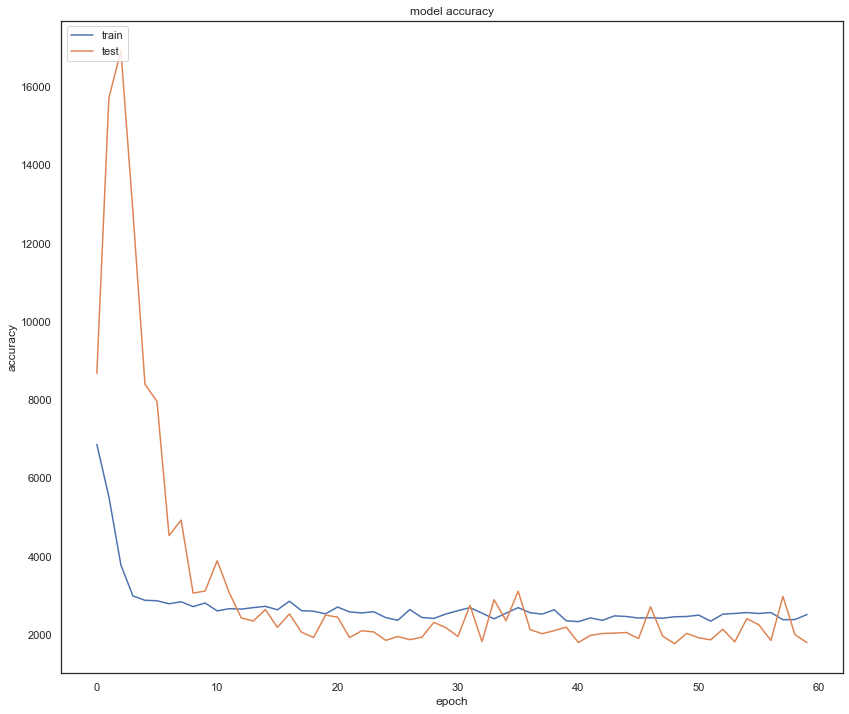

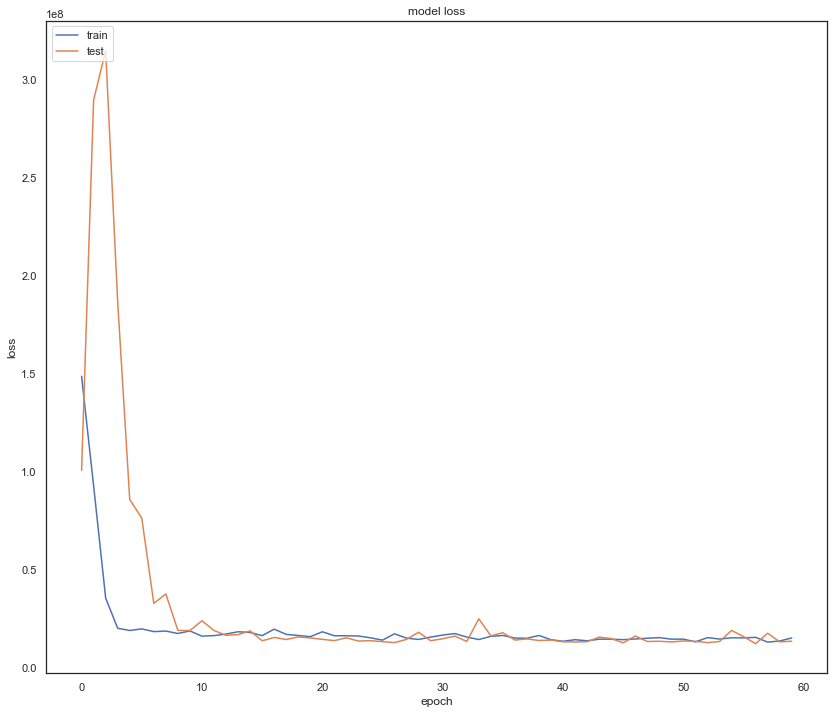

In [38]:
# summarize history for accuracy
plt.figure(figsize=(14,12))
plt.plot(model_tuned_hist.history['mae'])
plt.plot(model_tuned_hist.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(14,12))
plt.plot(model_tuned_hist.history['loss'])
plt.plot(model_tuned_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
actual_power_generated = pd.DataFrame(y_test)
actual_power_generated.columns=['Actual Wine Quality']
actual_power_generated.reset_index(drop=True,inplace=True)
predicted_power_generated = pd.DataFrame(y_pred_keras)
predicted_power_generated.columns=['Predicted Wine Quality']

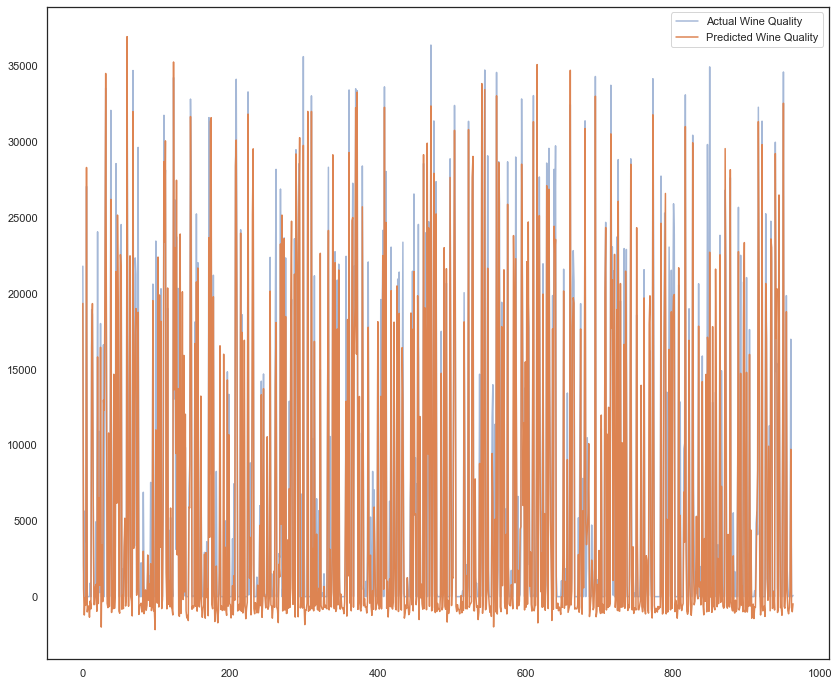

In [40]:
fig = plt.figure(figsize=(14,12))
plt.plot(actual_power_generated,label='Actual Wine Quality',alpha=0.5)
plt.plot(predicted_power_generated,label='Predicted Wine Quality')
plt.legend(loc='best')
plt.show()